In [14]:
import numpy as np
from tqdm import tqdm

# Caminhos dos arquivos
path_y = "C:\\Users\\stefa\\OneDrive\\Documentos\\Natali 2\\SB00_augmented_y.npy"
path_data = "C:\\Users\\stefa\\OneDrive\\Documentos\\Natali 2\\SB00_augmented.npy"

# Carregando dados com barra de progresso
print("Carregando dados de Y")
with tqdm(total=1) as pbar:
    Y = np.load(path_y)
    pbar.update(1)

print("Carregando dados de X")
with tqdm(total=1) as pbar:
    X = np.load(path_data)
    pbar.update(1)

Carregando dados de Y


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1015.08it/s]


Carregando dados de X


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 112.65it/s]


In [15]:
# Informações sobre os dados
print(f"Formato de X: {X.shape}")
print(f"Formato de Y: {Y.shape}")
print(f"Tipo de dados de X: {X.dtype}")
print(f"Tipo de dados de Y: {Y.dtype}")

Formato de X: (144, 2, 75, 75)
Formato de Y: (144,)
Tipo de dados de X: float64
Tipo de dados de Y: float64


In [17]:
# Transposição dos dados
X = X.transpose(0, 2, 3, 1)  # Transpõe para (N, altura, largura, canais)

# Normalização dos dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(X.shape[0], -1))  # Redimensiona para normalizar
X = X.reshape(X.shape[0], 75, 75, 2)  # Retorna para a forma original

print("Dados transpostos e normalizados com sucesso!")

Dados transpostos e normalizados com sucesso!


In [18]:
# Verificação da integridade dos dados
assert len(X_train) == len(Y_train), "Número de amostras em X_train e Y_train não coincidem"
assert len(X_test) == len(Y_test), "Número de amostras em X_test e Y_test não coincidem"
assert len(X_val) == len(Y_val), "Número de amostras em X_val e Y_val não coincidem"

In [19]:
# Divisão dos dados em treino, teste e validação
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_seed)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.125, random_state=random_seed)

In [20]:
# Embaralhamento dos dados
random_seed = 42
X, Y = shuffle(X, Y, random_state=random_seed)

In [21]:
# Impressão das dimensões finais dos dados
print(f"Dimensões finais de X_train: {X_train.shape}")
print(f"Dimensões finais de Y_train: {Y_train.shape}")
print(f"Dimensões finais de X_test: {X_test.shape}")
print(f"Dimensões finais de Y_test: {Y_test.shape}")
print(f"Dimensões finais de X_val: {X_val.shape}")
print(f"Dimensões finais de Y_val: {Y_val.shape}")

Dimensões finais de X_train: (100, 75, 75, 2)
Dimensões finais de Y_train: (100,)
Dimensões finais de X_test: (29, 75, 75, 2)
Dimensões finais de Y_test: (29,)
Dimensões finais de X_val: (15, 75, 75, 2)
Dimensões finais de Y_val: (15,)


In [22]:
# Salvar os dados pré-processados
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)
np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)
np.save("X_val.npy", X_val)
np.save("Y_val.npy", Y_val)

print("Dados pré-processados salvos com sucesso!")

Dados pré-processados salvos com sucesso!


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [26]:
# Define the model input shape
input_shape = (75, 75, 2)  # Adjust to your data shape
input_tensor = Input(shape=input_shape)

In [27]:
#RC deve substituir uma ou mais dessas camadas

# Convolutional layers
x = Conv2D(8, (5, 5), activation='relu', strides=(1, 1), padding='same', data_format='channels_last', kernel_regularizer=regularizers.l2(0.0001))(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.2)(x)

x = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', data_format='channels_last', kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.3)(x)

x = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', data_format='channels_last', kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.4)(x)

# Dense layers
x = Flatten()(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.5)(x)

# Output layer
output_tensor = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

In [30]:
from tensorflow.keras.optimizers import Adam  # Importando Adam

# Parâmetros de compilação
optimizer = Adam()
metrics = ['accuracy']
loss = 'binary_crossentropy'

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Caminho para salvar checkpoints
checkpoint_filepath = 'melhor_modelo_pesos.weights.keras'

In [40]:
# Callbacks
checkpoint = ModelCheckpoint(
    filepath='melhor_modelo_pesos.weights.keras',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True,
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=50,  # Stop training if validation accuracy doesn't improve for 5 epochs
    restore_best_weights=True  # Restore the best model weights after stopping
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss to trigger learning rate reduction
    factor=0.5,  # Reduce the learning rate by a factor of 0.5
    patience=50,  # Reduce the learning rate if validation loss doesn't improve for 5 epochs
    min_lr=1e-05  # Minimum learning rate to prevent it from becoming too small
)

#Combine callbacks into a list:
callbacks = [checkpoint, early_stopping, reduce_lr]

In [41]:
# Carregar dados pré-processados
X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")
X_val = np.load("X_val.npy")
Y_val = np.load("Y_val.npy")
X_test = np.load("X_test.npy")
Y_test = np.load("Y_test.npy")

# Imprimir formatos dos dados
print("Formato de X_train:", X_train.shape)
print("Formato de Y_train:", Y_train.shape)
print("Formato de X_val:", X_val.shape)
print("Formato de Y_val:", Y_val.shape)
print("Formato de X_test:", X_test.shape)
print("Formato de Y_test:", Y_test.shape)

Formato de X_train: (100, 75, 75, 2)
Formato de Y_train: (100,)
Formato de X_val: (15, 75, 75, 2)
Formato de Y_val: (15,)
Formato de X_test: (29, 75, 75, 2)
Formato de Y_test: (29,)


In [42]:
# Train the model
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, Y_val),
    shuffle=True,
    verbose=1,
    callbacks=callbacks  # Now you're passing the list of callbacks
)

Epoch 1/50
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9184 - loss: 0.6924 
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to melhor_modelo_pesos.weights.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9230 - loss: 0.6439 - val_accuracy: 0.6667 - val_loss: 0.6989 - learning_rate: 5.0000e-04
Epoch 2/50
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8889 - loss: 0.3797
Epoch 2: val_accuracy did not improve from 0.66667
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8853 - loss: 0.4282 - val_accuracy: 0.2667 - val_loss: 0.7153 - learning_rate: 5.0000e-04
Epoch 3/50
2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9375 - loss: 0.5844
Epoch 3: val_accuracy did not improve from 0.66667
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9324 - loss: 0.5299 - val_accuracy: 0.0667 - val_loss: 0.7283 - learning_rate: 5.0000e-04
Epoch 4/50
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9028 - loss: 0.3381
Epoch 4: val_accuracy did not improv

In [46]:
import json
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

# Salvar histórico, pesos e modelo
with open("history.json", "w") as f:
    json.dump(history.history, f)

model.save_weights("pesos_modelo.weights.h5")
model.save("modelo.keras")

# Carregar modelo salvo (apenas uma vez)
loaded_model = load_model("modelo.keras")

# Criar otimizador rmsprop (apenas uma vez)
rmsprop = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

# Compilar o modelo com rmsprop (apenas uma vez)
loaded_model.compile(
    optimizer=rmsprop,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
# Imprime o histórico
print(history.history)

{'accuracy': [0.9300000071525574, 0.8799999952316284, 0.9300000071525574, 0.9300000071525574, 0.9300000071525574, 0.9399999976158142, 0.949999988079071, 0.8899999856948853, 0.9300000071525574, 0.949999988079071, 0.9399999976158142, 0.9599999785423279, 0.9399999976158142, 0.9599999785423279, 0.949999988079071, 0.9599999785423279, 0.949999988079071, 0.949999988079071, 0.949999988079071, 0.9700000286102295, 0.9800000190734863, 0.9300000071525574, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9800000190734863, 0.9599999785423279, 0.9300000071525574, 0.9599999785423279, 0.9399999976158142, 0.9599999785423279, 0.9700000286102295, 0.9700000286102295, 0.9599999785423279, 0.9700000286102295, 0.949999988079071, 0.949999988079071, 0.9399999976158142, 0.9599999785423279, 0.949999988079071, 0.9700000286102295, 0.9599999785423279, 0.949999988079071, 0.9700000286102295, 0.9700000286102295, 0.949999988079071, 0.9700000286102295, 0.9800000190734863, 0.959999978542327

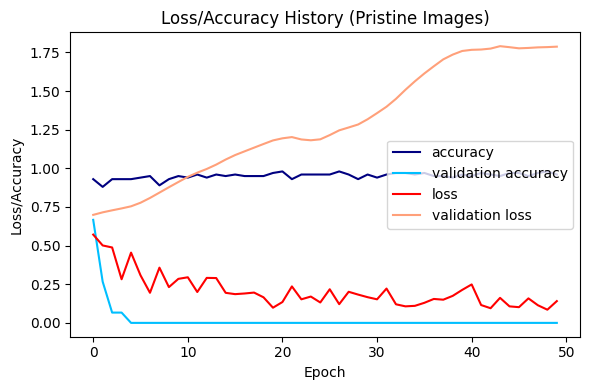

In [49]:
import json
import matplotlib.pyplot as plt # Importação da biblioteca matplotlib.pyplot

# Plotar histórico
with open("history.json", "r") as f:
    history_data = json.load(f)

loss = history_data['loss']
val_loss = history_data['val_loss']
acc = history_data['accuracy']
val_acc = history_data['val_accuracy']

epochs = list(range(len(loss)))
figsize=(6,4)
fig, axis1 = plt.subplots(figsize=figsize)

plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")
plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")

plots = plot1_loss + plot1_val_loss + plot1_lacc + plot1_val_lacc
labs = [l.get_label() for l in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History (Pristine Images)")
plt.tight_layout()
axis1.legend(loc='center right')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
cm [[ 1.  2.]
 [ 7. 19.]]
cm_norm [[0.33333333 0.66666667]
 [0.26923077 0.73076923]]
AUC: 0.5641025641025641


C:\Users\stefa\AppData\Local\Temp\ipykernel_21840\2011205976.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\stefa\AppData\Local\Temp\ipykernel_21840\2011205976.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


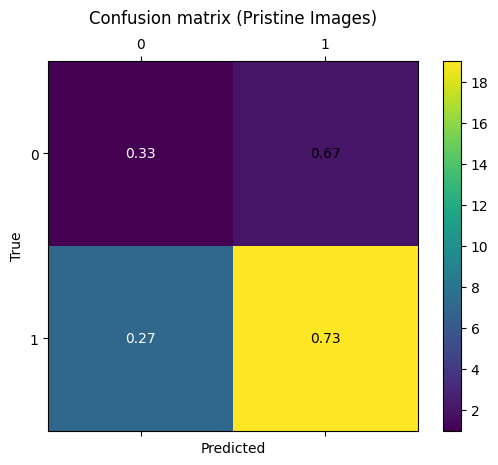

In [82]:
import json

# Carregar histórico
with open("history.json", "r") as f:
    history_data = json.load(f)
    
# predict
prob = loaded_model.predict(X_test)
pred =  (prob > 0.5).astype('int32') 

# measure confusion
labels=[0, 1]
cm = confusion_matrix(Y_test, pred, labels=labels)  # Use Y_test aqui
cm = cm.astype('float')
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
print("cm", cm)
print("cm_norm", cm_norm)

fpr, tpr, thresholds = roc_curve(Y_test, prob, pos_label=1)  # Use Y_test aqui
auc = roc_auc_score(Y_test, prob)
print("AUC:", auc)

#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix (Pristine Images)', y=1.08)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
        ha="center", va="center",
        color="white" if cm_norm[i, j] < thresh else "black")
plt.show()

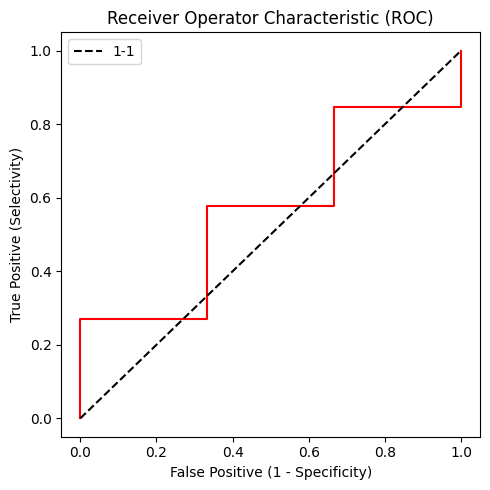

In [57]:
# ROC TEST SET
figsize=(5,5)
fig, axis1 = plt.subplots(figsize=figsize)
x_onetoone = y_onetoone = [0, 1]
plt.plot(fpr, tpr, 'r-')
plt.plot(x_onetoone, y_onetoone, 'k--',  label="1-1")
plt.legend(loc=0)
plt.title("Receiver Operator Characteristic (ROC)")
plt.xlabel("False Positive (1 - Specificity)")
plt.ylabel("True Positive (Selectivity)")
plt.tight_layout()

In [59]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, pred)
print('F1 score: %f' % f1)

# brier score
bs = brier_score_loss(Y_test, prob)
print('Brier score: %f' % bs)

Accuracy: 0.689655
Precision: 0.904762
Recall: 0.730769
F1 score: 0.808511
Brier score: 0.244697


In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# ... (seu código para carregar os dados, treinar o modelo, etc.)

def analisar_probabilidades(prob, Y_test, pred):
    """
    Analisa as probabilidades dos exemplos TP, FP, TN e FN.

    Args:
        prob: Array de probabilidades previsto pelo modelo.
        Y_test: Etiquetas reais do conjunto de teste.
        pred: Previsões do modelo (0 ou 1).

    Returns:
        Tupla com as probabilidades médias de cada categoria:
            (media_tp, media_fp, media_tn, media_fn)
    """

    tp_indices = []
    fp_indices = []
    tn_indices = []
    fn_indices = []

    for i in range(len(Y_test)):
        if (Y_test[i] == 1 and pred[i, 0] == 1):  # TP
            tp_indices.append(i)
        elif (Y_test[i] == 0 and pred[i, 0] == 1): # FP
            fp_indices.append(i)
        elif (Y_test[i] == 0 and pred[i, 0] == 0): # TN
            tn_indices.append(i)
        elif (Y_test[i] == 1 and pred[i, 0] == 0): # FN
            fn_indices.append(i)

    media_tp = np.mean(prob[tp_indices]) if tp_indices else 0  # Calcula a média das probabilidades TP
    media_fp = np.mean(prob[fp_indices]) if fp_indices else 0
    media_tn = np.mean(prob[tn_indices]) if tn_indices else 0
    media_fn = np.mean(prob[fn_indices]) if fn_indices else 0

    return (media_tp, media_fp, media_tn, media_fn)

# Treinar o modelo (seu código de treinamento aqui)

# Predizer as probabilidades no conjunto de teste
prob = loaded_model.predict(X_test)
pred = (prob > 0.5).astype('int32')

# Analisar as probabilidades
media_tp, media_fp, media_tn, media_fn = analisar_probabilidades(prob, Y_test, pred)

# Fazer algo com as probabilidades
print("Probabilidade média TP:", media_tp)
print("Probabilidade média FP:", media_fp)
print("Probabilidade média TN:", media_tn)
print("Probabilidade média FN:", media_fn)

# Salvar as probabilidades em um arquivo (opcional)
with open("probabilidades.txt", "w") as f:
    f.write(f"Probabilidade média TP: {media_tp}\n")
    f.write(f"Probabilidade média FP: {media_fp}\n")
    f.write(f"Probabilidade média TN: {media_tn}\n")
    f.write(f"Probabilidade média FN: {media_fn}\n")

# ... (seu código para plotar os exemplos, etc.)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Probabilidade média TP: 0.50956446
Probabilidade média FP: 0.5055294
Probabilidade média TN: 0.49964088
Probabilidade média FN: 0.4980502


In [75]:
# Seraching for examples
for i in range(len(Y_test)):
    if (Y_test[i] == 1 and pred[i,0] == 1): # and other y_test vs pered combinations TP=(1,1), FP=(0,1), TN=(0,0), FN=(1,0)
        print (i)
        print(Y_test[i],pred[i])

    # Imprimir probabilidades para o exemplo atual (índice i)
    print(f"Probabilidade do exemplo {i}: {prob[i]}")

0
1.0 [1]
Probabilidade do exemplo 0: [0.50502425]
1
1.0 [1]
Probabilidade do exemplo 1: [0.5234292]
Probabilidade do exemplo 2: [0.49999052]
Probabilidade do exemplo 3: [0.4989255]
4
1.0 [1]
Probabilidade do exemplo 4: [0.5199567]
Probabilidade do exemplo 5: [0.50711596]
Probabilidade do exemplo 6: [0.49668896]
7
1.0 [1]
Probabilidade do exemplo 7: [0.5004041]
Probabilidade do exemplo 8: [0.49994725]
9
1.0 [1]
Probabilidade do exemplo 9: [0.50047714]
10
1.0 [1]
Probabilidade do exemplo 10: [0.5052137]
11
1.0 [1]
Probabilidade do exemplo 11: [0.51339173]
12
1.0 [1]
Probabilidade do exemplo 12: [0.50446725]
13
1.0 [1]
Probabilidade do exemplo 13: [0.50502425]
Probabilidade do exemplo 14: [0.49986705]
15
1.0 [1]
Probabilidade do exemplo 15: [0.50682163]
16
1.0 [1]
Probabilidade do exemplo 16: [0.5003359]
17
1.0 [1]
Probabilidade do exemplo 17: [0.5080124]
Probabilidade do exemplo 18: [0.4960476]
19
1.0 [1]
Probabilidade do exemplo 19: [0.50461173]
Probabilidade do exemplo 20: [0.49964088

Forma do conjunto de teste: (29, 75, 75, 2)
Formato de um exemplo: (75, 75, 2)


TypeError: Invalid shape (75, 75, 2) for image data

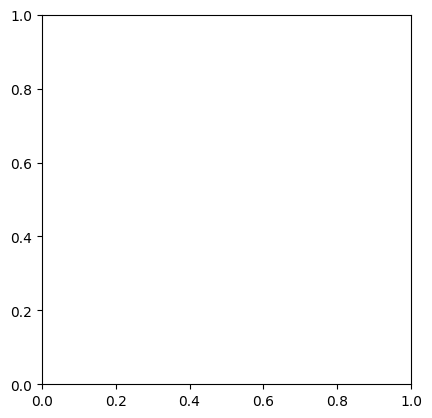

In [81]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import cv2

# ... (seu código para carregar os dados e treinar o modelo)

# Converter os dados para RGB
for i in range(len(X_test)):
    X_test[i] = cv2.cvtColor(X_test[i], cv2.COLOR_GRAY2RGB) 

# plot examples
tp1 = X_test[4] # Ajuste os índices para os exemplos do X_test
tp2 = X_test[14]
tp3 = X_test[20]
tp4 = X_test[28]

fp1 = X_test[0]
fp2 = X_test[12]
fp3 = X_test[27]
fp4 = X_test[25]

tn1 = X_test[1]
tn2 = X_test[10]
tn3 = X_test[19]
tn4 = X_test[23]

fn1 = X_test[3]
fn2 = X_test[15]
fn3 = X_test[21]
fn4 = X_test[26]

examples = [tp1, tp2, tp3, tp4, fp1, fp2, fp3, fp4, tn1, tn2, tn3, tn4, fn1, fn2, fn3, fn4]

fig1=plt.figure(figsize=(8,8))

for i, image in enumerate(examples):
    fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    plt.imshow(image, aspect='auto', cmap='viridis', norm=LogNorm())
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

# ... (resto do seu código) 

TypeError: Invalid shape (75, 75, 2) for image data

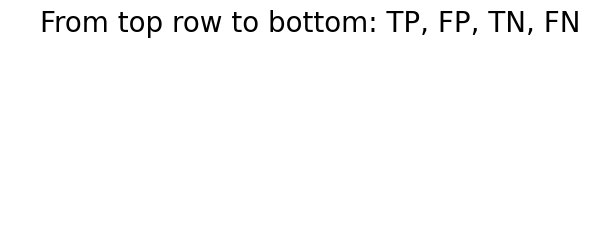

In [77]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Importação da classe LogNorm
import numpy as np

# plot examples
tp1 = X_test[4] # Ajuste os índices para os exemplos do X_test
tp2 = X_test[14]
tp3 = X_test[20]
tp4 = X_test[28]

fp1 = X_test[0]
fp2 = X_test[12]
fp3 = X_test[27]
fp4 = X_test[25]

tn1 = X_test[1]
tn2 = X_test[10]
tn3 = X_test[19]
tn4 = X_test[23]

fn1 = X_test[3]
fn2 = X_test[15]
fn3 = X_test[21]
fn4 = X_test[26]

examples = [tp1, tp2, tp3, tp4, fp1, fp2, fp3, fp4, tn1, tn2, tn3, tn4, fn1, fn2, fn3, fn4]

fig1=plt.figure(figsize=(8,8))

for i, image in enumerate(examples):
    fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    # Se você quer exibir os dois canais juntos, use a função np.stack()
    plt.imshow(np.stack((image[:, :, 0], image[:, :, 1]), axis=-1), aspect='auto', cmap='viridis', norm=LogNorm())
    # Se você quer exibir apenas um canal, use:
    # plt.imshow(image[:, :, 0], aspect='auto', cmap='viridis', norm=LogNorm()) 
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [ ]:
#make subsamples for plotting
list_past = []
list_future = []
list_nonmerger = []
for i in range(len(y_sub_test)):
    if y_sub_test[i,0]==1 and y_sub_test[i,1]==1:
        list_past.append(prob[i])
    if y_sub_test[i,0]==1 and y_sub_test[i,1]==0:
        list_future.append(prob[i])
    if y_sub_test[i,0]==0:
        list_nonmerger.append(prob[i])
past = np.stack(list_past)
future = np.stack(list_future)
non = np.stack(list_nonmerger)

print('TEST SET OF PRISTINE IMAGES SB00\n' 'Number of past mergers:',
      len(past) ,'\nNumber of future mergers:',
      len(future),'\nNumber of non-mergers:',len(non))

In [ ]:
# plot histogram
bins = 50
plt.hist(non, bins, alpha=0.9, label='non-mergers', color='red')
plt.hist(past, bins, alpha=1, label='past mergers', color='deepskyblue')
plt.hist(future, bins, alpha=1, label='future mergers', color='navy')
plt.legend(loc='upper center')
plt.xticks(np.arange(0.1, 1, step=0.1))
plt.yticks(np.arange(0, 310, step=50))
plt.xlabel("CNN Output")
plt.show()

In [ ]:
# Extracts the outputs of all layers except the input layer
layer_outputs = [layer.output for layer in loaded_model.layers[1:]] 
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=loaded_model.input, outputs=layer_outputs) 

# returns the values of the layer activations in the original model
# Returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(x_test) 

In [ ]:
# activation maps for all 8 filters in the first convolutional layer
fig1=plt.figure(figsize=(10,1.5))  
for i in range(8):
    plt.subplot(1, 8, i + 1)
    layer_activation = activations[0]
    plt.imshow(layer_activation[1649,i, :, :], cmap='viridis',aspect='auto')
    plt.axis("off")
    plt.subplots_adjust(hspace=0, wspace=0)

# activation maps for all 16 filters in the second convolutional layer    
fig2=plt.figure(figsize=(10,3))  
for i in range(16):
    plt.subplot(2, 8, i + 1)
    layer_activation = activations[4]
    plt.imshow(layer_activation[1649,i, :, :], cmap='viridis',aspect='auto')
    plt.axis("off")
    plt.subplots_adjust(hspace=0, wspace=0)
    
# activation maps for all 32 filters in the third convolutional layer
fig3=plt.figure(figsize=(10,6))  
for i in range(32):
    plt.subplot(4, 8, i + 1)
    layer_activation = activations[8]
    plt.imshow(layer_activation[1649,i, :, :], cmap='viridis',aspect='auto')
    plt.axis("off")
    plt.subplots_adjust(hspace=0, wspace=0)

In [ ]:
# largest output probabilities
example_i_TP=[]
example_i_FP=[]
example_i_TN=[]
example_i_FN=[]

for i in range(len(prob)):
    if prob[i] > 0.90 and y_test[i]==1:
        example_i_TP.append(i) 
    if prob[i] > 0.80 and y_test[i]==0:
        example_i_FP.append(i) 
        
        
for i in range(len(prob)):
    if prob[i] < 0.1 and y_test[i]==0:
        example_i_TN.append(i) 
    if prob[i] < 0.15 and y_test[i]==1:
        example_i_FN.append(i) 
        
        
# lowest output probabilities
bad_example_i_TP=[]
bad_example_i_FP=[]
bad_example_i_TN=[]
bad_example_i_FN=[]

for i in range(len(prob)):
    if 0.5 < prob[i] < 0.55 and y_test[i]==1:
        bad_example_i_TP.append(i) 
    if 0.5 < prob[i] < 0.58 and y_test[i]==0:
        bad_example_i_FP.append(i) 
        
        
for i in range(len(prob)):
    if 0.44 < prob[i] < 0.5 and y_test[i]==0:
        bad_example_i_TN.append(i) 
    if 0.44 < prob[i] < 0.5 and y_test[i]==1:
        bad_example_i_FN.append(i) 

In [ ]:
# set channel_first data format in Keras backend in order for grad-CAM to work properly
K.set_image_data_format('channels_first')

# find the last convolutional layer
penultimate_layer = utils.find_layer_idx(loaded_model, 'conv2d_3')
class_idx = 0 # choose the class position in the output layer, here 0 since the output has just one dimention
layer_idx = -1 # location of the output layer

In [ ]:
# make a list of four TP, FP, TN and FN high-probability examples 
example_list=[example_i_TP[22],example_i_TP[2],example_i_TP[4],example_i_TP[5],
             example_i_FP[1],example_i_FP[7],example_i_FP[3],example_i_FP[4],
             example_i_TN[2],example_i_TN[3],example_i_TN[11],example_i_TN[5],
             example_i_FN[1],example_i_FN[2],example_i_FN[15],example_i_FN[5]]

fig1=plt.figure(figsize=(7,7))
fig1.suptitle("TP, FP, TN and FN (from top to bottom rows) high-probability examples (grad-CAMs of the last convolutional layer)")

for i in range(16):
    grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, 
                              seed_input=x_test[example_list[i]], penultimate_layer_idx=penultimate_layer,
                              backprop_modifier='guided')
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    plt.imshow(grads, aspect='auto', cmap='viridis')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [ ]:
# make a list of four TP, FP, TN and FN low-probability examples 
bad_example_list=[bad_example_i_TP[22],bad_example_i_TP[2],bad_example_i_TP[4],bad_example_i_TP[5],
             bad_example_i_FP[1],bad_example_i_FP[7],bad_example_i_FP[3],bad_example_i_FP[4],
             bad_example_i_TN[13],bad_example_i_TN[20],bad_example_i_TN[11],bad_example_i_TN[5],
             bad_example_i_FN[1],bad_example_i_FN[7],bad_example_i_FN[15],bad_example_i_FN[5]]

fig1=plt.figure(figsize=(7,7))
fig1.suptitle("TP, FP, TN and FN (from top to bottom rows) low-probability examples (grad-CAMs of the last convolutional layer)")

for i in range(16):
    grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, 
                              seed_input=x_test[bad_example_list[i]], penultimate_layer_idx=penultimate_layer,
                              backprop_modifier='guided')
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    plt.imshow(grads, aspect='auto', cmap='viridis')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [ ]:
# Bootstraping is used to show errors of different clasificaiton scoring methods. 
# We make 1000 bootstraping resamples and recalculate AUC, accuracy etc.
# Then we find 95% CI for these values.

y_pred = pred # output class 0 or 1
y_prob = prob # output probability between 0 and 1
y_true = y_test # true class 0 or 1

n_bootstraps = 1000
rng_seed = 3  # controls reproducibility
bootstrapped_auc = []
bootstrapped_accuracy = []
bootstrapped_precision = []
bootstrapped_recall = []
bootstrapped_f1 = []
bootstrapped_brier = []
bootstrapped_fpr = []
bootstrapped_tpr = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_prob) - 1, len(y_prob))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score_auc = roc_auc_score(y_true[indices], y_prob[indices])
    bootstrapped_auc.append(score_auc)
   
    score_acc = accuracy_score(y_true[indices], y_pred[indices])
    bootstrapped_accuracy.append(score_acc)
    
    score_precision = precision_score(y_true[indices], y_pred[indices])
    bootstrapped_precision.append(score_precision)
    
    score_recall = recall_score(y_true[indices], y_pred[indices])
    bootstrapped_recall.append(score_recall)
    
    score_f1 = f1_score(y_true[indices], y_pred[indices])
    bootstrapped_f1.append(score_f1)
    
    score_brier = brier_score_loss(y_true[indices], y_prob[indices])
    bootstrapped_brier.append(score_brier)
    
    fpr_score, tpr_score, thresholds_score = metrics.roc_curve(y_true[indices], y_prob[indices], pos_label=1)
    bootstrapped_fpr.append(fpr_score)
    bootstrapped_tpr.append(tpr_score)

In [ ]:
# we can plot histograms to see the bootstraped values
# change to "bootstrapped_accuracy,bootstrapped_precision,bootstrapped_recall,
# bootstrapped_f1,bootstrapped_brier", for other histograms
plt.hist(bootstrapped_auc, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [ ]:
sorted_auc = np.array(bootstrapped_auc)
sorted_acc = np.array(bootstrapped_accuracy)
sorted_precision = np.array(bootstrapped_precision)
sorted_recall = np.array(bootstrapped_recall)
sorted_f1 = np.array(bootstrapped_f1)
sorted_brier = np.array(bootstrapped_brier)

sorted_auc.sort()
sorted_acc.sort()
sorted_precision.sort()
sorted_recall.sort()
sorted_f1.sort()
sorted_brier.sort()

# Computing the lower and upper bound of the 95% confidence interval
confidence_lower_auc = sorted_auc[int(0.025 * len(sorted_auc))]
confidence_upper_auc = sorted_auc[int(0.975 * len(sorted_auc))]

confidence_lower_acc = sorted_acc[int(0.025 * len(sorted_acc))]
confidence_upper_acc = sorted_acc[int(0.975 * len(sorted_acc))]
                                 
confidence_lower_precision = sorted_precision[int(0.025 * len(sorted_precision))]
confidence_upper_precision = sorted_precision[int(0.975 * len(sorted_precision))]
                                 
confidence_lower_recall = sorted_recall[int(0.025 * len(sorted_recall))]
confidence_upper_recall = sorted_recall[int(0.975 * len(sorted_recall))]
                                       
confidence_lower_f1 = sorted_f1[int(0.025 * len(sorted_f1))]
confidence_upper_f1 = sorted_f1[int(0.975 * len(sorted_f1))]
                                 
confidence_lower_brier = sorted_brier[int(0.025 * len(sorted_brier))]
confidence_upper_brier = sorted_brier[int(0.975 * len(sorted_brier))]


print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_prob)))
print("95% Confidence interval for the AUC score: [{:0.3} - {:0.3}]".format(
    confidence_lower_auc, confidence_upper_auc))
print("95%CI AUC errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_auc - roc_auc_score(y_true, y_prob), 
    confidence_upper_auc - roc_auc_score(y_true, y_prob)))

print("Original Accuracy: {:0.3f}".format(accuracy_score(y_true, y_pred)))
print("95% Confidence interval for the Accuracy: [{:0.3} - {:0.3}]".format(
    confidence_lower_acc, confidence_upper_acc))
print("95%CI Accuracy errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_acc - accuracy_score(y_true, y_pred), 
    confidence_upper_acc - accuracy_score(y_true, y_pred)))

print("Original Precision: {:0.3f}".format(precision_score(y_true, y_pred)))
print("95% Confidence interval for the Precision: [{:0.3} - {:0.3}]".format(
    confidence_lower_precision, confidence_upper_precision))
print("95%CI Precision errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_precision - precision_score(y_true, y_pred), 
    confidence_upper_precision - precision_score(y_true, y_pred)))

print("Original Recall: {:0.3f}".format(recall_score(y_true, y_pred)))
print("95% Confidence interval for the Recall: [{:0.3} - {:0.3}]".format(
    confidence_lower_recall, confidence_upper_recall))
print("95%CI Recall errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_recall - recall_score(y_true, y_pred), 
    confidence_upper_recall - recall_score(y_true, y_pred)))

print("Original F1 score: {:0.3f}".format(f1_score(y_true, y_pred)))
print("95% Confidence interval for the F1 score: [{:0.3} - {:0.3}]".format(
    confidence_lower_f1, confidence_upper_f1))
print("95%CI F1 score errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_f1 - f1_score(y_true, y_pred), 
    confidence_upper_f1 - f1_score(y_true, y_pred)))

print("Original Brier score: {:0.3f}".format(brier_score_loss(y_true, y_prob)))
print("95% Confidence interval for the Brier score: [{:0.3} - {:0.3}]".format(
    confidence_lower_brier, confidence_upper_brier))
print("95%CI Brier score errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_brier - brier_score_loss(y_true, y_prob), 
    confidence_upper_brier - brier_score_loss(y_true, y_prob)))

In [ ]:
# We can also find 95%CI (in vertical direction) for the ROC curve

tprs = []
base_fpr = np.linspace(0, 1, 1001)

for i in range(len(bootstrapped_fpr)):  
    tpr1 = interp(base_fpr, bootstrapped_fpr[i], bootstrapped_tpr[i])
    tpr1[0] = 0.0
    tprs.append(tpr1)

tprs = np.array(tprs)
mean = tprs.mean(axis=0) # mean tpr
std = tprs.std(axis=0) # standard deviation of tpr

# 95%CI can be calculated as:
tprs_upper_95 = mean + 1.96*std  # 1.96 is z-score for 95%CI
tprs_lower_95 = mean - 1.96*std


# Plots ROC curve with 95%CI in the vertical direction
figsize=(6,6)
fig, axis1 = plt.subplots(figsize=figsize)
x_onetoone = y_onetoone = [0, 1]

prist = plt.plot(fpr, tpr, 'navy', linewidth=2, label='pristine images')
prist_fill = plt.fill_between(base_fpr, tprs_lower_95, tprs_upper_95, color='deepskyblue', alpha=0.9, label='95%CI pristine images')
line = plt.plot(x_onetoone, y_onetoone, 'k--',linewidth=1, label="1-1")


plt.legend(loc='lower right')
plt.xlabel("False Positive (1 - Specificity)")
plt.ylabel("True Positive (Selectivity)")
plt.tight_layout()